In [1]:
# ! pip install ddaclient>=1.1.6
import ddaclient

ddac = ddaclient.RemoteDDA(service_url="private=https://dda-interface-private.obsuks1.unige.ch,public=http://dda-interface-public.obsuks1.unige.ch", 
                           ddcache_root_local="/data/reduced/ddcache",
                        #    ddcache_root_local="/mnt/sshfs/lesta/projects/astro/integral/data/reduced/ddcache-public-usr_astro_in-p1"
                           )

In [ ]:
# oda:version "v0.1.0"

In [2]:
from odafunction.executors import default_execute_to_value
from odafunction.func.urifunc import URIipynbFunction, URIValue


v = default_execute_to_value(URIipynbFunction.from_generic_uri("file:///home/savchenk/grb221009/grbbase.ipynb")(focus_obs_name="total_3p"), valueclass=URIValue, cached=True)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
DEBUG:root:big problem with sentry: FileNotFoundError(2, 'No such file or directory')
DEBUG:matplotlib:matplotlib data path: /home/savchenk/miniconda-recent/lib/python3.9/site-packages/matplotlib/mpl-data
DEBUG:matplotlib:CONFIGDIR=/home/savchenk/.config/matplotlib
DEBUG:matplotlib:interactive is False
DEBUG:matplotlib:platform is linux
DEBUG:matplotlib:CACHEDIR=/home/savchenk/.cache/matplotlib
DEBUG:matplotlib.font_manager:Using fontManager instance from /home/savchenk/.cache/matplotlib/fontlist-v330.json
INFO:odafunction.func.urifunc:constructing <class 'odafunction.func.urifunc.URIipynbFunction'> from uri=file:///home/savchenk/grb221009/grbbase.ipynb value=None provenance=None
INFO:odafunction.func.urifunc:parsing URI file:///home/savchenk/grb22100...(45)
INFO:odafunction.func.urifunc:parsed uri file:///home/savchenk/grb221009/grbbase.ipynb as {'modifier': None, 'schema': 'file', 'path': '/home/savchenk/grb221009/grbbase.ipynb', 'f

In [3]:
import pandas as pd
import requests
from astropy.coordinates import SkyCoord
from astropy import units as u

src_coord = SkyCoord("19h 13m 03.43s", "+19d 46m 23.1s", unit=u.deg)

scw_dict_all = pd.DataFrame(requests.get(f"https://www.astro.unige.ch/mmoda/dispatch-data/gw/timesystem/api/v1.0/scwlist/cons/2022-10-09T00:00:00/2023-10-23T00:00:00?"
             f"ra={src_coord.ra.deg}&dec={src_coord.dec.deg}&radius=15&return_columns=SWID,SW_TYPE,TELAPSE,TSTART,TSTOP").json())


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): www.astro.unige.ch:443
DEBUG:urllib3.connectionpool:https://www.astro.unige.ch:443 "GET /mmoda/dispatch-data/gw/timesystem/api/v1.0/scwlist/cons/2022-10-09T00:00:00/2023-10-23T00:00:00?ra=288.26429166666657&dec=19.773083333333332&radius=15&return_columns=SWID,SW_TYPE,TELAPSE,TSTART,TSTOP HTTP/1.1" 200 28923


In [4]:
cat = ["SourceCatalog", {"autoversion": True, "catalog": [
            {"NAME":"SGR 1935+2154", "RA": 293.73200 , "DEC":  21.89672},
            {"NAME":"GRB 221009A", "RA": src_coord.ra.deg , "DEC":  src_coord.dec.deg}
]}]

In [5]:
rs = {}

for scw in scw_dict_all[scw_dict_all.SW_TYPE.str.strip()=='POINTING'].SWID:
    print(scw)

    if scw not in rs:
        try:
                r = ddac.query(target="ii_light", 
                        prompt_delegate=True,
                        modules=["git://ddosa/staging-1-3", "git://findic/staging-1-3-icversion", "git://ddosa11/staging-1-3", "git://integral_all_private", "git://ii_light", "git://gencat/staging-1-3"],
                        assume=[
                                        f'ddosa.ScWData(input_scwid="{scw}.001")',
                                        'ii_light.TimeBin(use_tbin=1)'
                                ],
                        inject=[cat])
                rs[scw] = r
        except ddaclient.AnalysisDelegatedException:
                pass
        except ddaclient.AnalysisException as e:
                print("problem", e)
#     break

INFO:ddaclient:(('modules', 'git://ddosa/staging-1-3,git://findic/staging-1-3-icversion,git://ddosa11/staging-1-3,git://integral_all_private,git://ii_light,git://gencat/staging-1-3'), {})
INFO:ddaclient:(('assume', 'ddosa.ScWData(input_scwid="255800700010.001"),ii_light.TimeBin(use_tbin=1)'), {})
INFO:ddaclient:(('service url:', 'https://dda-interface-private.obsuks1.unige.ch'), {})
INFO:ddaclient:(('target:', 'ii_light'), {})
INFO:ddaclient:(('inject:', [['SourceCatalog', {'autoversion': True, 'catalog': [{'NAME': 'SGR 1935+2154', 'RA': 293.732, 'DEC': 21.89672}, {'NAME': 'GRB 221009A', 'RA': 288.26429166666657, 'DEC': 19.773083333333332}]}]]), {})
INFO:ddaclient:request to pipeline with parameters: {'url': 'https://dda-interface-private.obsuks1.unige.ch/api/v2.0/ii_light', 'params': {'modules': 'git://ddosa,git://ddosa/staging-1-3,git://findic/staging-1-3-icversion,git://ddosa11/staging-1-3,git://integral_all_private,git://ii_light,git://gencat/staging-1-3', 'assume': 'ddosa.ScWData(

255800700010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16312
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"255800700010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2558/255800700010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

255800710010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16321
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"255800710010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2558/255800710010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

255800720010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16320
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"255800720010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2558/255800720010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

255800730010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16320
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"255800730010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2558/255800730010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

255800740010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16322
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"255800740010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2558/255800740010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

255800750010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16316
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"255800750010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2558/255800750010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

255800760010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16313
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"255800760010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2558/255800760010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

255800770010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16318
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"255800770010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2558/255800770010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

255800780010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16311
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"255800780010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2558/255800780010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

255800790010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16323
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"255800790010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2558/255800790010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

255800800010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16312
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"255800800010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2558/255800800010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

255800810010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16323
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"255800810010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2558/255800810010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

255800820010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16321
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"255800820010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2558/255800820010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

255800820020


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16320
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"255800820020.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2558/255800820020.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

255900010010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 17555
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"255900010010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":"unreable","data":"unreadable-object-data","exceptions":{"exception":["dataanalysis.core.AnalysisException","{}"],"exception_type":"node"},"hashe":"unreable","modules":["git://ddosa","git://ddosa/staging-1-3","git://findic/staging-1-3-icversion","git://ddosa11/staging-1-3","git://integral_all_private","git://ii_light","git://gencat/staging-1-3"],"result":"INFO:from_uri:found ODAHUB URI option: https://crux-private.obsuks1.unige.ch@default\nINFO:[ QueueProxy: leader=https://crux-private.obsuks1.unige.ch queue=default ]:initialized\nINFO:from_uri:probing connection...\nINFO:from_uri:succeeded!\ninitialized dqueue: [ QueueProxy: leader=https://crux-private.obsuks1.unige.ch queue=default ]\n1677449049.5039396 \u001btop\u001b 14118/140123263825728 wil

problem ('found analysis exceptions', [['dataanalysis.core.AnalysisException', '{}']])
255900020010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 17556
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"255900020010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":"unreable","data":"unreadable-object-data","exceptions":{"exception":["dataanalysis.core.AnalysisException","{}"],"exception_type":"node"},"hashe":"unreable","modules":["git://ddosa","git://ddosa/staging-1-3","git://findic/staging-1-3-icversion","git://ddosa11/staging-1-3","git://integral_all_private","git://ii_light","git://gencat/staging-1-3"],"result":"INFO:from_uri:found ODAHUB URI option: https://crux-private.obsuks1.unige.ch@default\nINFO:[ QueueProxy: leader=https://crux-private.obsuks1.unige.ch queue=default ]:initialized\nINFO:from_uri:probing connection...\nINFO:from_uri:succeeded!\ninitialized dqueue: [ QueueProxy: leader=https://crux-private.obsuks1.unige.ch queue=default ]\n1677449052.9629753 \u001btop\u001b 14133/140035102771008 wil

problem ('found analysis exceptions', [['dataanalysis.core.AnalysisException', '{}']])
255900030010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16313
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"255900030010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2559/255900030010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

255900040010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16320
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"255900040010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2559/255900040010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

255900050010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16319
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"255900050010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2559/255900050010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

255900060010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16320
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"255900060010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2559/255900060010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

255900070010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16320
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"255900070010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2559/255900070010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

255900080010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16317
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"255900080010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2559/255900080010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

255900090010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16315
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"255900090010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2559/255900090010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

255900100010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16309
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"255900100010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2559/255900100010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

255900110010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16315
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"255900110010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2559/255900110010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

255900120010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16316
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"255900120010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2559/255900120010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

255900130010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16319
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"255900130010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2559/255900130010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

255900140010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16315
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"255900140010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2559/255900140010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

255900150010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16320
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"255900150010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2559/255900150010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

255900160010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16309
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"255900160010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2559/255900160010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

255900170010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16315
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"255900170010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2559/255900170010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

255900180010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16320
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"255900180010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2559/255900180010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

255900190010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16312
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"255900190010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2559/255900190010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

255900200010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16320
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"255900200010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2559/255900200010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

255900210010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16316
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"255900210010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2559/255900210010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

255900220010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16399
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"255900220010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2559/255900220010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

255900230010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16321
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"255900230010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2559/255900230010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

255900240010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16312
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"255900240010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2559/255900240010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

255900250010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16315
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"255900250010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2559/255900250010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

255900260010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16402
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"255900260010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2559/255900260010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

255900270010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16320
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"255900270010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2559/255900270010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

255900280010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16319
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"255900280010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2559/255900280010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

255900290010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16316
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"255900290010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2559/255900290010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

255900300010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16316
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"255900300010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2559/255900300010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

255900310010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16319
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"255900310010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2559/255900310010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

255900320010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16316
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"255900320010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2559/255900320010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

255900330010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16321
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"255900330010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2559/255900330010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

255900340010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16311
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"255900340010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2559/255900340010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

255900350010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16319
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"255900350010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2559/255900350010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

255900360010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16311
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"255900360010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2559/255900360010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

256000290010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16315
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"256000290010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2560/256000290010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

256000300010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16312
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"256000300010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2560/256000300010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

256000310010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16313
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"256000310010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2560/256000310010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

256000320010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16322
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"256000320010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2560/256000320010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

256000330010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16313
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"256000330010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2560/256000330010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

256000340010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16317
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"256000340010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2560/256000340010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

256000350010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16323
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"256000350010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2560/256000350010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

256000360010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16308
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"256000360010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2560/256000360010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

256000370010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16311
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"256000370010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2560/256000370010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

256000380010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16315
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"256000380010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2560/256000380010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

256000390010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16315
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"256000390010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2560/256000390010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

256000400010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16312
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"256000400010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2560/256000400010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

256000410010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16316
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"256000410010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2560/256000410010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

256000420010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16312
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"256000420010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2560/256000420010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

256000430010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16317
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"256000430010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2560/256000430010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

256000440010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16320
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"256000440010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2560/256000440010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

256000450010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16314
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"256000450010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2560/256000450010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

256000460010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16318
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"256000460010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2560/256000460010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

256000470010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16316
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"256000470010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2560/256000470010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

256000480010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16311
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"256000480010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2560/256000480010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

256000490010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16322
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"256000490010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2560/256000490010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

256000500010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16314
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"256000500010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2560/256000500010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

256000510010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16315
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"256000510010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2560/256000510010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

256000520010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16312
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"256000520010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2560/256000520010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

256000530010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16316
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"256000530010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2560/256000530010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

256000540010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16317
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"256000540010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2560/256000540010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

256000550010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16321
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"256000550010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2560/256000550010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

256000560010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16318
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"256000560010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2560/256000560010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

256000570010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16320
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"256000570010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2560/256000570010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

256000580010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16316
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"256000580010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2560/256000580010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

256000590010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16315
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"256000590010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2560/256000590010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

256000600010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16318
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"256000600010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2560/256000600010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

256000610010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16311
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"256000610010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2560/256000610010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

256000620010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16320
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"256000620010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2560/256000620010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

256000630010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16320
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"256000630010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2560/256000630010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

256000640010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16319
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"256000640010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2560/256000640010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

256200030010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 17562
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"256200030010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":"unreable","data":"unreadable-object-data","exceptions":{"exception":["dataanalysis.core.AnalysisException","{}"],"exception_type":"node"},"hashe":"unreable","modules":["git://ddosa","git://ddosa/staging-1-3","git://findic/staging-1-3-icversion","git://ddosa11/staging-1-3","git://integral_all_private","git://ii_light","git://gencat/staging-1-3"],"result":"INFO:from_uri:found ODAHUB URI option: https://crux-private.obsuks1.unige.ch@default\nINFO:[ QueueProxy: leader=https://crux-private.obsuks1.unige.ch queue=default ]:initialized\nINFO:from_uri:probing connection...\nINFO:from_uri:succeeded!\ninitialized dqueue: [ QueueProxy: leader=https://crux-private.obsuks1.unige.ch queue=default ]\n1677449266.7357085 \u001btop\u001b 14863/140185846916928 wil

problem ('found analysis exceptions', [['dataanalysis.core.AnalysisException', '{}']])
256200040010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16308
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"256200040010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2562/256200040010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

256200040020


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16312
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"256200040020.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2562/256200040020.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

256200040030


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16322
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"256200040030.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2562/256200040030.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

256400030010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 17557
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"256400030010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":"unreable","data":"unreadable-object-data","exceptions":{"exception":["dataanalysis.core.AnalysisException","{}"],"exception_type":"node"},"hashe":"unreable","modules":["git://ddosa","git://ddosa/staging-1-3","git://findic/staging-1-3-icversion","git://ddosa11/staging-1-3","git://integral_all_private","git://ii_light","git://gencat/staging-1-3"],"result":"INFO:from_uri:found ODAHUB URI option: https://crux-private.obsuks1.unige.ch@default\nINFO:[ QueueProxy: leader=https://crux-private.obsuks1.unige.ch queue=default ]:initialized\nINFO:from_uri:probing connection...\nINFO:from_uri:succeeded!\ninitialized dqueue: [ QueueProxy: leader=https://crux-private.obsuks1.unige.ch queue=default ]\n1677449278.8765938 \u001btop\u001b 14905/140228604331840 wil

problem ('found analysis exceptions', [['dataanalysis.core.AnalysisException', '{}']])
256400040010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 17554
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"256400040010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":"unreable","data":"unreadable-object-data","exceptions":{"exception":["dataanalysis.core.AnalysisException","{}"],"exception_type":"node"},"hashe":"unreable","modules":["git://ddosa","git://ddosa/staging-1-3","git://findic/staging-1-3-icversion","git://ddosa11/staging-1-3","git://integral_all_private","git://ii_light","git://gencat/staging-1-3"],"result":"INFO:from_uri:found ODAHUB URI option: https://crux-private.obsuks1.unige.ch@default\nINFO:[ QueueProxy: leader=https://crux-private.obsuks1.unige.ch queue=default ]:initialized\nINFO:from_uri:probing connection...\nINFO:from_uri:succeeded!\ninitialized dqueue: [ QueueProxy: leader=https://crux-private.obsuks1.unige.ch queue=default ]\n1677449282.4900277 \u001btop\u001b 14914/139641363031872 wil

problem ('found analysis exceptions', [['dataanalysis.core.AnalysisException', '{}']])
256400050010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16314
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"256400050010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2564/256400050010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

256400060010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16318
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"256400060010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2564/256400060010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

256400070010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16314
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"256400070010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2564/256400070010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

256400080010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16315
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"256400080010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2564/256400080010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

256400090010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16319
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"256400090010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2564/256400090010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

256400100010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16319
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"256400100010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2564/256400100010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

256400110010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16312
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"256400110010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2564/256400110010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

256400120010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16314
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"256400120010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2564/256400120010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

256400130010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16314
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"256400130010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2564/256400130010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

256400140010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16315
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"256400140010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2564/256400140010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

256400150010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16313
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"256400150010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2564/256400150010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

256400160010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16320
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"256400160010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2564/256400160010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

256400170010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16317
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"256400170010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2564/256400170010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

256400180010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16320
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"256400180010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2564/256400180010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

256400190010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16319
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"256400190010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2564/256400190010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

256400200010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16322
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"256400200010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2564/256400200010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

256400210010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16323
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"256400210010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2564/256400210010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

256400220010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16313
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"256400220010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2564/256400220010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

256500830010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 17559
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"256500830010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":"unreable","data":"unreadable-object-data","exceptions":{"exception":["dataanalysis.core.AnalysisException","{}"],"exception_type":"node"},"hashe":"unreable","modules":["git://ddosa","git://ddosa/staging-1-3","git://findic/staging-1-3-icversion","git://ddosa11/staging-1-3","git://integral_all_private","git://ii_light","git://gencat/staging-1-3"],"result":"INFO:from_uri:found ODAHUB URI option: https://crux-private.obsuks1.unige.ch@default\nINFO:[ QueueProxy: leader=https://crux-private.obsuks1.unige.ch queue=default ]:initialized\nINFO:from_uri:probing connection...\nINFO:from_uri:succeeded!\ninitialized dqueue: [ QueueProxy: leader=https://crux-private.obsuks1.unige.ch queue=default ]\n1677449341.30989 \u001btop\u001b 15114/140559892125504 will 

problem ('found analysis exceptions', [['dataanalysis.core.AnalysisException', '{}']])
256500840010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 17558
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"256500840010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":"unreable","data":"unreadable-object-data","exceptions":{"exception":["dataanalysis.core.AnalysisException","{}"],"exception_type":"node"},"hashe":"unreable","modules":["git://ddosa","git://ddosa/staging-1-3","git://findic/staging-1-3-icversion","git://ddosa11/staging-1-3","git://integral_all_private","git://ii_light","git://gencat/staging-1-3"],"result":"INFO:from_uri:found ODAHUB URI option: https://crux-private.obsuks1.unige.ch@default\nINFO:[ QueueProxy: leader=https://crux-private.obsuks1.unige.ch queue=default ]:initialized\nINFO:from_uri:probing connection...\nINFO:from_uri:succeeded!\ninitialized dqueue: [ QueueProxy: leader=https://crux-private.obsuks1.unige.ch queue=default ]\n1677449344.8607633 \u001btop\u001b 15123/140546707306304 wil

problem ('found analysis exceptions', [['dataanalysis.core.AnalysisException', '{}']])
256900050010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16314
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"256900050010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2569/256900050010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

256900060010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16315
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"256900060010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2569/256900060010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

256900070010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16315
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"256900070010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2569/256900070010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

256900080010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16314
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"256900080010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2569/256900080010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

256900090010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16312
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"256900090010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2569/256900090010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

256900100010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16314
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"256900100010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2569/256900100010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

256900110010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16318
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"256900110010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2569/256900110010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

256900120010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16318
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"256900120010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2569/256900120010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

256900130010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16322
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"256900130010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2569/256900130010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

256900140010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16316
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"256900140010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2569/256900140010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

256900150010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16321
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"256900150010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2569/256900150010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

256900160010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16313
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"256900160010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2569/256900160010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

256900170010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16320
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"256900170010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2569/256900170010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

256900180010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16321
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"256900180010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2569/256900180010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

256900190010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16316
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"256900190010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2569/256900190010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

256900200010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16315
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"256900200010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2569/256900200010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

256900210010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16321
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"256900210010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2569/256900210010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

256900220010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16314
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"256900220010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2569/256900220010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

256900230010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16319
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"256900230010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2569/256900230010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

256900240010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16317
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"256900240010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2569/256900240010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

256900250010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16315
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"256900250010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2569/256900250010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

256900260010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16310
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"256900260010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2569/256900260010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

256900270010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16318
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"256900270010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2569/256900270010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

256900280010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16325
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"256900280010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2569/256900280010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

257100010010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 17553
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"257100010010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":"unreable","data":"unreadable-object-data","exceptions":{"exception":["dataanalysis.core.AnalysisException","{}"],"exception_type":"node"},"hashe":"unreable","modules":["git://ddosa","git://ddosa/staging-1-3","git://findic/staging-1-3-icversion","git://ddosa11/staging-1-3","git://integral_all_private","git://ii_light","git://gencat/staging-1-3"],"result":"INFO:from_uri:found ODAHUB URI option: https://crux-private.obsuks1.unige.ch@default\nINFO:[ QueueProxy: leader=https://crux-private.obsuks1.unige.ch queue=default ]:initialized\nINFO:from_uri:probing connection...\nINFO:from_uri:succeeded!\ninitialized dqueue: [ QueueProxy: leader=https://crux-private.obsuks1.unige.ch queue=default ]\n1677449420.0099328 \u001btop\u001b 15380/140167520868160 wil

problem ('found analysis exceptions', [['dataanalysis.core.AnalysisException', '{}']])
257100020010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 17556
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"257100020010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":"unreable","data":"unreadable-object-data","exceptions":{"exception":["dataanalysis.core.AnalysisException","{}"],"exception_type":"node"},"hashe":"unreable","modules":["git://ddosa","git://ddosa/staging-1-3","git://findic/staging-1-3-icversion","git://ddosa11/staging-1-3","git://integral_all_private","git://ii_light","git://gencat/staging-1-3"],"result":"INFO:from_uri:found ODAHUB URI option: https://crux-private.obsuks1.unige.ch@default\nINFO:[ QueueProxy: leader=https://crux-private.obsuks1.unige.ch queue=default ]:initialized\nINFO:from_uri:probing connection...\nINFO:from_uri:succeeded!\ninitialized dqueue: [ QueueProxy: leader=https://crux-private.obsuks1.unige.ch queue=default ]\n1677449422.923542 \u001btop\u001b 15389/139759226275648 will

problem ('found analysis exceptions', [['dataanalysis.core.AnalysisException', '{}']])
257100030010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16317
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"257100030010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2571/257100030010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

257100040010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16317
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"257100040010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2571/257100040010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

257100050010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16320
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"257100050010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2571/257100050010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

257100060010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16324
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"257100060010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2571/257100060010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

257100070010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16318
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"257100070010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2571/257100070010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

257100080010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16322
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"257100080010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2571/257100080010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

257100090010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16319
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"257100090010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2571/257100090010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

257100100010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16309
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"257100100010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2571/257100100010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

257100110010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16312
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"257100110010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2571/257100110010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

257100120010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16320
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"257100120010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2571/257100120010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

257100130010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16317
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"257100130010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2571/257100130010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

257100140010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16320
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"257100140010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2571/257100140010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

257100150010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16312
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"257100150010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2571/257100150010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

257100160010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16321
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"257100160010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2571/257100160010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

257100170010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16315
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"257100170010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2571/257100170010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

257100180010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16318
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"257100180010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2571/257100180010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

257100190010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16313
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"257100190010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2571/257100190010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

257100200010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16319
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"257100200010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2571/257100200010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

257100210010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16320
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"257100210010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2571/257100210010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

257100220010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16315
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"257100220010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2571/257100220010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

257100230010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16316
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"257100230010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2571/257100230010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

257100240010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16318
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"257100240010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2571/257100240010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

257100250010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16310
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"257100250010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2571/257100250010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

257100260010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16328
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"257100260010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2571/257100260010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

258200050010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16313
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"258200050010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2582/258200050010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

258200060010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16317
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"258200060010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2582/258200060010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

258200070010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16316
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"258200070010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2582/258200070010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

258200080010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16309
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"258200080010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2582/258200080010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

258200110010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16313
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"258200110010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2582/258200110010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

258200120010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16321
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"258200120010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2582/258200120010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

258200130010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16315
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"258200130010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2582/258200130010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

258200140010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16320
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"258200140010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2582/258200140010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

258500070010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16308
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"258500070010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2585/258500070010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

258500080010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16321
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"258500080010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2585/258500080010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

258500090010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16322
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"258500090010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2585/258500090010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

258500130010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16318
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"258500130010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2585/258500130010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

258500140010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16316
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"258500140010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2585/258500140010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

258500150010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16319
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"258500150010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2585/258500150010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

258600340010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16316
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"258600340010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2586/258600340010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

258600350010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16313
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"258600350010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2586/258600350010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

258600360010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16319
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"258600360010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":["/data/reduced/ddcache/byscw/2586/258600360010.001/ii_light.v0//cce9a91b/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits","

260300880010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 1265
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"260300880010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":"unreable","data":"unreadable-object-data","exceptions":{"comment":null,"delegation_state":"submitted","exception":"[AnalysisDelegatedException: None; ; submitted]","exception_type":"delegation","hashe":null,"origin":null,"resources":[],"source_exceptions":null},"hashe":"unreable","modules":["git://ddosa","git://ddosa/staging-1-3","git://findic/staging-1-3-icversion","git://ddosa11/staging-1-3","git://integral_all_private","git://ii_light","git://gencat/staging-1-3"],"result":"INFO:from_uri:found ODAHUB URI option: https://crux-private.obsuks1.unige.ch@default\nINFO:[ QueueProxy: leader=https://crux-private.obsuks1.unige.ch queue=default ]:initialized\nINFO:from_uri:probing connection...\nINFO:from_uri:succeeded!\ninitialized dqueue: [ QueueProxy:

260300890010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 1265
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"260300890010.001\"),ii_light.TimeBin(use_tbin=1)","cached_path":"unreable","data":"unreadable-object-data","exceptions":{"comment":null,"delegation_state":"submitted","exception":"[AnalysisDelegatedException: None; ; submitted]","exception_type":"delegation","hashe":null,"origin":null,"resources":[],"source_exceptions":null},"hashe":"unreable","modules":["git://ddosa","git://ddosa/staging-1-3","git://findic/staging-1-3-icversion","git://ddosa11/staging-1-3","git://integral_all_private","git://ii_light","git://gencat/staging-1-3"],"result":"INFO:from_uri:found ODAHUB URI option: https://crux-private.obsuks1.unige.ch@default\nINFO:[ QueueProxy: leader=https://crux-private.obsuks1.unige.ch queue=default ]:initialized\nINFO:from_uri:probing connection...\nINFO:from_uri:succeeded!\ninitialized dqueue: [ QueueProxy:

In [6]:
from astropy.time import Time

T0 = Time(v['output_values']['data']['T0_isot'])
T0_ijd = T0.mjd - 51544

In [7]:
from astropy.io import fits
import numpy as np
from matplotlib import pylab as plt

d = None

for scw, r in rs.items():
    with fits.open(r.lc) as f:
        for e in f:
            if e.header.get('NAME', '').startswith("GRB"):
                _ = e.data
                print("found in ", scw)

                if d is None:
                    d = _
                else:
                    d = np.concatenate([d, _])



found in  255800700010
found in  255800710010
found in  255800720010
found in  255800730010
found in  255800740010
found in  255800750010
found in  255800760010
found in  255800770010
found in  255800780010
found in  255800790010
found in  255800800010
found in  255800810010
found in  255800820010
found in  255800820020
found in  255900030010
found in  255900040010
found in  255900050010
found in  255900060010
found in  255900070010
found in  255900080010
found in  255900090010
found in  255900100010
found in  255900110010
found in  255900120010
found in  255900130010
found in  255900140010
found in  255900150010
found in  255900160010
found in  255900170010
found in  255900180010
found in  255900190010
found in  255900200010
found in  255900210010
found in  255900230010
found in  255900240010
found in  255900250010
found in  255900260010
found in  255900270010
found in  255900280010
found in  255900290010
found in  255900300010
found in  255900310010
found in  255900320010
found in  2

DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/home/savchenk/miniconda-recent/lib/python3.9/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizTwoSymReg.ttf', name='STIXSizeTwoSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/home/savchenk/miniconda-recent/lib/python3.9/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerifDisplay.ttf', name='DejaVu Serif Display', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/home/savchenk/miniconda-r

[4.0717535 4.2190394 4.0091844 4.1762934 5.148194  4.5538173 4.4915233
 4.2321844 4.11552   4.358212  5.203084  4.674004 ]


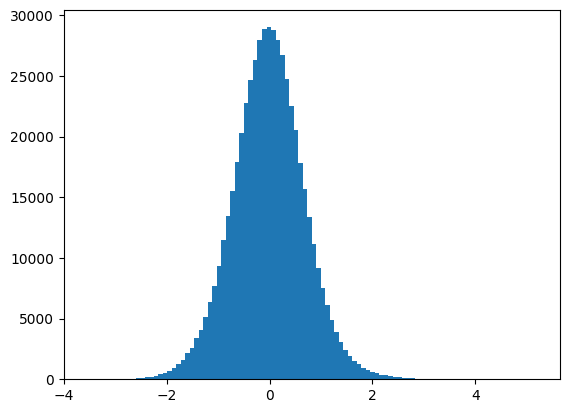

In [8]:
plt.figure()

# plt.plot(d['TIME'] - T0_ijd, d['RATE'])

s = d['RATE']/d['ERROR']

plt.hist(s, 100)
# plt.semilogy()
print(s[s>4])


In [12]:
# TODO put response!
ul_1s_ecs = np.nanpercentile(d['ERROR'], 90) * 3 / 300 * 1e-8

In [ ]:
ul_1s_ecs